Mengimport library dan mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import imageio
import matplotlib.pyplot as plt

Mounted at /content/drive


Mengambil gambar dari google drive

In [ ]:
file_path = '/content/drive/MyDrive/Rafale.jpg'
img = imageio.imread(file_path)

<ipython-input-18-f5ae534573be>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(file_path)


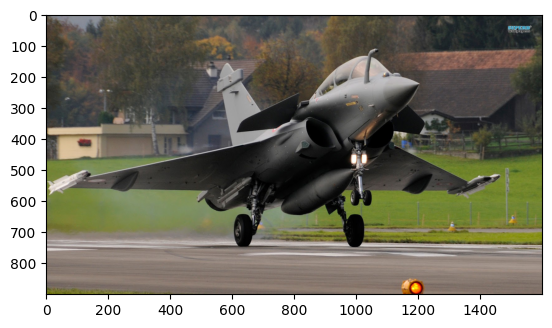

In [ ]:
plt.imshow(img)
plt.show()

Mendapatkan Resolusi dan type dari gambar

In [ ]:
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]
img_type = img.dtype

print("Ukuran gambar: {} x {} x {}".format(img_height, img_width, img_channel))
print("Tipe gambar: {}".format(img_type))

Ukuran gambar: 900 x 1600 x 3
Tipe gambar: uint8


**Gray scale**

Membuat variabel img_brightness untuk menampung hasil

In [ ]:
img_brightness = np.zeros(img.shape, dtype=np.uint8)

Melakukan penambahan brightness dengan nilai yg menjadi parameter
def rgbbrighter(nilai):

In [ ]:
def brighter(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray += nilai
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            img_brightness[y][x] = (gray, gray, gray)

Menampilkan beberapa hasil dengan nilai brightness -100 dan 100

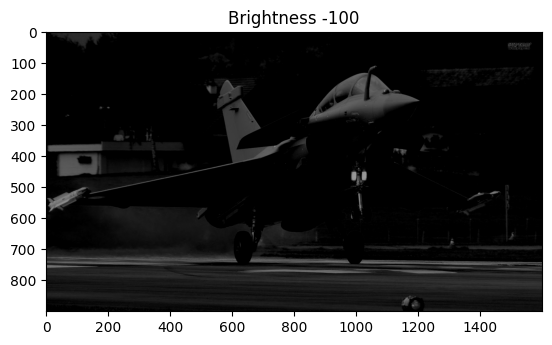

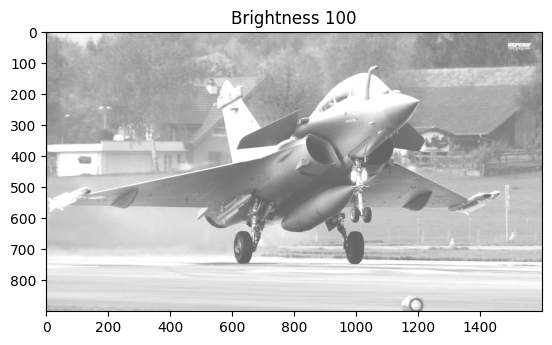

In [ ]:
brighter(-100)
plt.imshow(img_brightness)
plt.title("Brightness -100")
plt.show()

brighter(100)
plt.imshow(img_brightness)
plt.title("Brightness 100")
plt.show()

**Brightness RGB**

Membuat variabel img_rgbbrightness untuk menampung hasil

In [ ]:
img_rgbbrightness = np.zeros(img.shape, dtype=np.uint8)

Melakukan penambahan brightness dengan nilai yg menjadi parameter

In [ ]:
def rgbbrighter(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            red += nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            green = img[y][x][1]
            green += nilai
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            blue = img[y][x][2]
            blue += nilai
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            img_rgbbrightness[y][x] = (red, green, blue)

Menampilkan beberapa hasil dengan nilai brightness -100 dan 100

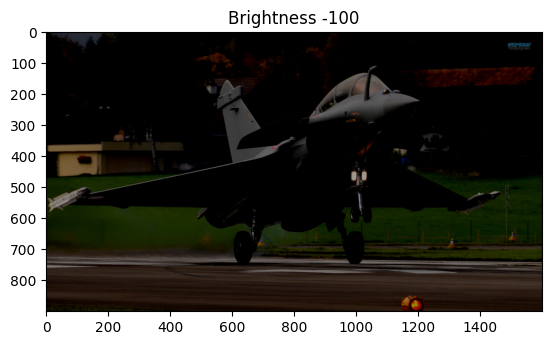

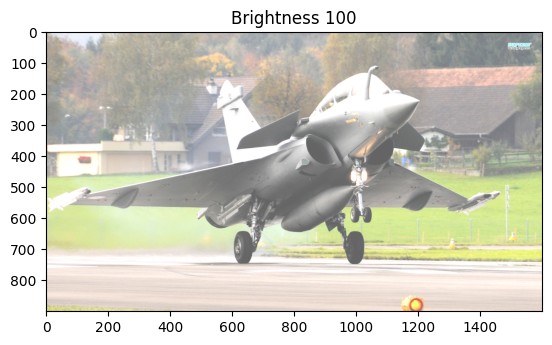

In [ ]:
rgbbrighter(-100)
plt.imshow(img_rgbbrightness)
plt.title("Brightness -100")
plt.show()

rgbbrighter(100)
plt.imshow(img_rgbbrightness)
plt.title("Brightness 100")
plt.show()

**Contrast**

1. Membuat variabel img_contrass untuk menampung hasil

In [ ]:
img_contrast = np.zeros(img.shape, dtype=np.uint8)

2. Melakukan penambahan contrass dengan nilai yg menjadi parameter

In [ ]:
def contrast(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray *= nilai
            if gray > 255:
                gray = 255
            img_contrast[y][x] = (gray, gray, gray)

Menampilkan beberapa hasil dengan nilai contrass 50 dan 100

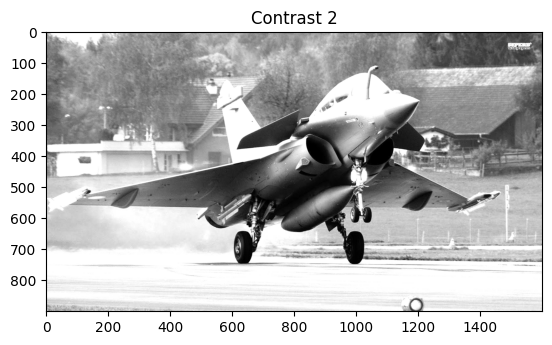

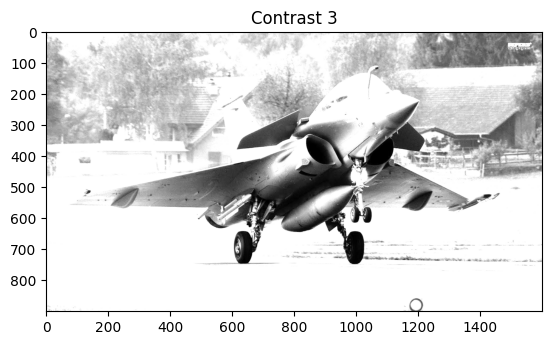

In [ ]:
contrast(2)
plt.imshow(img_contrast)
plt.title("Contrast 2")
plt.show()

contrast(3)
plt.imshow(img_contrast)
plt.title("Contrast 3")
plt.show()

**Contrass Autolevel**

1. Membuat variabel img_contrass untuk menampung hasil

In [ ]:
img_autocontrass = np.zeros(img.shape, dtype=np.uint8)

2. Melakukan penambahan contrass secara otomatis

In [ ]:
def autocontrass():
    xmax = 300
    xmin = 0
    d = 0
    # Mendapatkan nilai d, dimana nilai d ini akan berpengaruh pada hitungan
    # untuk mendapatkan tingkat kontras
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            if gray < xmax:
                xmax = gray
            if gray > xmin:
                xmin = gray
    d = xmin-xmax
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray = int(float(255/d) * (gray-xmax))
            img_autocontrass[y][x] = (gray, gray, gray)

3. Menampilkan hasil autolevel contrass

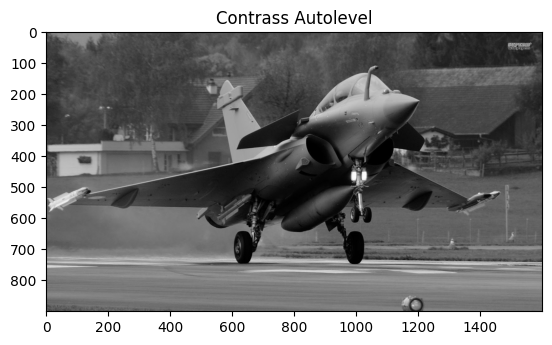

In [ ]:
autocontrass()
plt.imshow(img_autocontrass)
plt.title("Contrass Autolevel")
plt.show()